In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import wave
import sys

In [2]:
freq = 50
time_period = 1/freq
amplitude = 2
time = 2*time_period

In [3]:
t = np.arange(0.0, 5.0, 0.02)

In [4]:
x = 2 * np.pi *  t
y = np.sin(x)

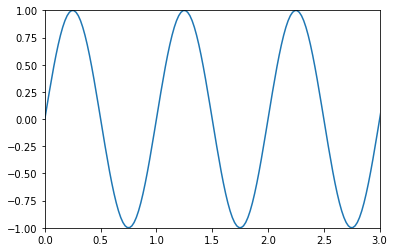

In [5]:
figure1 = plt.figure()
plt.plot(t, y, '-')
plt.axis([0,3,-1,1])
plt.show()

In [2]:
#Sampling
Fs = 1000
Ts = 1 / Fs
txs = np.arange(0, (time + Ts/2), Ts)
r = np.round(len(t)/ len(txs))

xts = np.arange(0, len(t), r).astype('int')
xs = x[xts]
ys = y[xts]

NameError: name 'time' is not defined

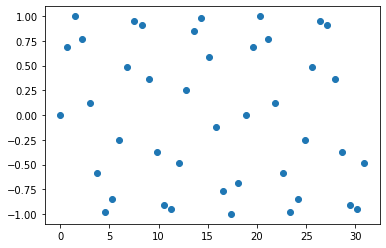

In [7]:
figure2 = plt.figure()
plt.plot(xs, ys, linestyle = " ", marker = 'o')

<BarContainer object of 42 artists>

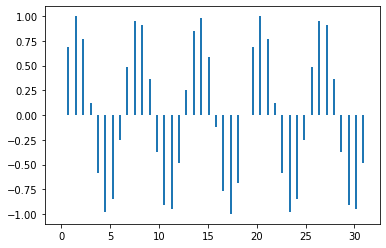

In [8]:
plt.bar(xs, ys, bottom=0, width=0.2)

In [9]:
ys[2]

0.9980267284282716

In [10]:
ys

array([ 0.00000000e+00,  6.84547106e-01,  9.98026728e-01,  7.70513243e-01,
        1.25333234e-01, -5.87785252e-01, -9.82287251e-01, -8.44327926e-01,
       -2.48689887e-01,  4.81753674e-01,  9.51056516e-01,  9.04827052e-01,
        3.68124553e-01, -3.68124553e-01, -9.04827052e-01, -9.51056516e-01,
       -4.81753674e-01,  2.48689887e-01,  8.44327926e-01,  9.82287251e-01,
        5.87785252e-01, -1.25333234e-01, -7.70513243e-01, -9.98026728e-01,
       -6.84547106e-01, -7.34788079e-16,  6.84547106e-01,  9.98026728e-01,
        7.70513243e-01,  1.25333234e-01, -5.87785252e-01, -9.82287251e-01,
       -8.44327926e-01, -2.48689887e-01,  4.81753674e-01,  9.51056516e-01,
        9.04827052e-01,  3.68124553e-01, -3.68124553e-01, -9.04827052e-01,
       -9.51056516e-01, -4.81753674e-01])

In [11]:
ys.min()

-0.9980267284282716

In [12]:
ys.max()

0.9980267284282717

In [13]:
ys = (ys - ys.min()) / (ys.max() - ys.min())

In [14]:
ys

array([0.5       , 0.84295029, 1.        , 0.88601834, 0.56279052,
       0.2055263 , 0.0078853 , 0.07700135, 0.3754092 , 0.74135309,
       0.97646846, 0.95330803, 0.6844262 , 0.3155738 , 0.04669197,
       0.02353154, 0.25864691, 0.6245908 , 0.92299865, 0.9921147 ,
       0.7944737 , 0.43720948, 0.11398166, 0.        , 0.15704971,
       0.5       , 0.84295029, 1.        , 0.88601834, 0.56279052,
       0.2055263 , 0.0078853 , 0.07700135, 0.3754092 , 0.74135309,
       0.97646846, 0.95330803, 0.6844262 , 0.3155738 , 0.04669197,
       0.02353154, 0.25864691])

In [15]:
len(ys)

42

In [16]:
ys *= 64

In [17]:
ys

array([32.        , 53.94881837, 64.        , 56.70517379, 36.01859325,
       13.15368303,  0.50465912,  4.92808615, 24.02618912, 47.4465979 ,
       62.49398143, 61.01171367, 43.80327676, 20.19672324,  2.98828633,
        1.50601857, 16.5534021 , 39.97381088, 59.07191385, 63.49534088,
       50.84631697, 27.98140675,  7.29482621,  0.        , 10.05118163,
       32.        , 53.94881837, 64.        , 56.70517379, 36.01859325,
       13.15368303,  0.50465912,  4.92808615, 24.02618912, 47.4465979 ,
       62.49398143, 61.01171367, 43.80327676, 20.19672324,  2.98828633,
        1.50601857, 16.5534021 ])

In [18]:
ys.round()

array([32., 54., 64., 57., 36., 13.,  1.,  5., 24., 47., 62., 61., 44.,
       20.,  3.,  2., 17., 40., 59., 63., 51., 28.,  7.,  0., 10., 32.,
       54., 64., 57., 36., 13.,  1.,  5., 24., 47., 62., 61., 44., 20.,
        3.,  2., 17.])

In [19]:
ys = ys.astype('int32')

In [20]:
ys.dtype

dtype('int32')

In [21]:
bin(ys[2]).replace("0b", "")

'1000000'

In [22]:
def ADC(numpy_array):
    numpy_array = numpy_array.astype('int32')
    for i in range(0, len(numpy_array)):
        #print(numpy_array[i])
        numpy_array[i] = bin(numpy_array[i]).replace('0b', '')
    return numpy_array

In [23]:
ys = ADC(ys)

In [24]:
ys

array([ 100000,  110101, 1000000,  111000,  100100,    1101,       0,
           100,   11000,  101111,  111110,  111101,  101011,   10100,
            10,       1,   10000,  100111,  111011,  111111,  110010,
         11011,     111,       0,    1010,   11111,  110101, 1000000,
        111000,  100100,    1101,       0,     100,   11000,  101111,
        111110,  111101,  101011,   10100,      10,       1,   10000],
      dtype=int32)

In [25]:
format(ys[0], '07d')

'0100000'

In [26]:
def lengthNormalizer(numpy_array):
    output_array = []
    for i in range(0, len(numpy_array)):
        output_array.append(format(numpy_array[i], '07d'))
    return output_array

In [27]:
op = lengthNormalizer(ys)

In [28]:
op[0]

'0100000'